# Q-Learning with OpenAI Taxi

https://www.gymlibrary.ml/environments/toy_text/taxi/
</br>

The goal of this game is that our agent must <b>pick up the passenger at one location and drop him off to the goal as fast as possible.</b>

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. 

- You receive +20 points for a successful dropoff
- Lose 1 point for every timestep it takes. 
- There is also a 10 point penalty for illegal pick-up and drop-off actions (if you don't drop the passenger in one of the 3 other locations)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('q2ZOEFAaaI0')

### Import the dependencies

In [10]:
import numpy as np
import gym
import random

### Create the environment

In [11]:
env = gym.make("Taxi-v3")
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### Create the Q-table and initialize it 
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [12]:
action_size = env.action_space.n
print("Action size ", action_size)

state_size = env.observation_space.n
print("State size ", state_size)

Action size  6
State size  500


In [13]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


### Create the hyperparameters

In [17]:
total_episodes = 50000        # Total episodes
total_test_episodes = 10     # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

### The Q learning algorithm

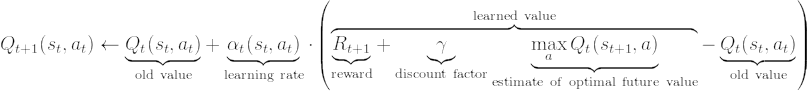

- Now we implement the Q learning algorithm:

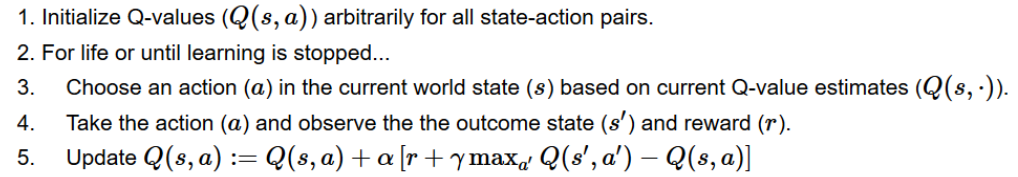

In [15]:
# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 

### Use our Q-table to play Taxi !
- After 50 000 episodes, our Q-table can be used as a "cheatsheet" to play Taxi.
- By running this cell you can see our agent playing Taxi.

In [16]:
from IPython.display import clear_output
import time

In [18]:
env.reset()
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        print("****************************************************")
        print("EPISODE ", episode)
        print ("Score", total_rewards)
        env.render()
        time.sleep(0.2)
        clear_output(wait=True)
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

Score 7
Score over time: 8.0
